# Abstract 

The Sallen Key topology is a particular type of topology used to implement electronic filters. A Sallen Key filter generally uses unity gain amplifiers built using opamps to achieve filtering action. This is a degenerate form of VCVS filters. The analysis of the step responses of the second order Sallen Key low pass and high pass filters are of particular interest to us and are analysed using symbolic python.

# Introduction 

## Insert figure here

The above circuit represents a Sallen Key low pass filter. From the number of capacitors, it is evident that this is a second order low pass filter. Further, the opamp is non-ideal and has a constant gain $G$ with infinite bandwidth. Nodal analysis of the given circuit yields the following 
\begin{equation}
A\cdot c = b
\end{equation}
with 
A= $\left(
\begin{matrix}
0 & 0 & 1 & \frac{-1}{G} \\
\frac{-1}{1+sR_2C_2} & 1 & 0 & 0 \\
0 & -G & G & 1 \\
-\frac{1}{R_1} -\frac{1}{R_2} - sC_1 & \frac{1}{R_2} & 0 & sC_1
\end{matrix}
\right)$
, c= $\left(
\begin{matrix}
V_1  \\
V_p  \\
V_m  \\
V_0 
\end{matrix}
\right)$ 
, b= $\left(
\begin{matrix}
0  \\
0  \\
0  \\
-\frac{V_i(s)}{R_1} 
\end{matrix}
\right)$. 

The subsequent inversion and mathematical analysis is done with the help of $sympy$, Python's symbolic python library. The transfer functions so obtained are analysied using the scipy library with the help of signals toolbox. This analyis is extended to the following high pass filter.

## Insert image here

# Method and code

The following makes the necesary imports. 

In [9]:
from __future__ import division
% matplotlib inline
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})
import scipy.signal as sp
from sympy import *
init_session
size=(10,8)

The low pass and high functions that do the aforementioned analysis are defined here. A helper function useful for plotting is also defined. 

In [10]:
# defining useful functions 

def lowpass(R1,R2,C1,C2,G,Vi):
    s= symbols("s")
    A= Matrix([[0, 0, 1, -1/G],
             [-1/(1+s*R2*C2), 1, 0, 0 ],
             [0, -G, G, 1],
             [-1/R1  -1/R2- s*C1, 1/R2, 0, s*C1]])
    b= Matrix([0, 0, 0, -Vi/R1])
    # b is treated as a vector,
    # not a matrix
    V= A.inv()*b
    return A,b,V

def highpass(R1,R3,C1,C2,G,Vi):
    s= symbols("s")
    A= Matrix([[1, -1/G, 0, 0],
             [-G, -1, G, 0 ],
             [0, 0, 1, -(s*C2*R3)/(1+s*R3*C2)],
             [0, 1/R1, s*C2, -s*C1 - s*C2- 1/R1]])
    b= Matrix([0, 0, 0, -s*C1*Vi])
    # b is treated as a vector,
    # not a matrix
    V= A.inv()*b
    return A,b,V

def plotfigure(figsize,xlabel,ylabel,title,x,y,style="k-",graph="plot"):
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if graph=="plot":
        plt.plot(x,y,style)
    if graph== "semilogx":
        plt.semilogx(x,y,style)
    if graph== "semilogy":
        plt.semilogy(x,y,style)
    if graph== "loglog":
        plt.loglog(x,y,style)
    plt.tight_layout()
    plt.show()
    plt.close()
    
def u(t):
    return 1*(t>=0)

The following piece of code obtains the impulse response of the low pass filter for the values of $C_1 = C_2 = C = 1nF $ and $R1 = R2 = 10k \Omega $. This transfer function is obtained in symbolic form, converted to a callable function and its magnitude response is plotted. The simplified transfer funciton with terms with very small coefficients ignored is printed beneath the magnitude repsonse.

-0.0001586/((1.0e-5*s + 1)*(-2.0e-9*s + 1.586e-9*s/(1.0e-5*s + 1) - 0.0004 + 0.0002/(1.0e-5*s + 1)))


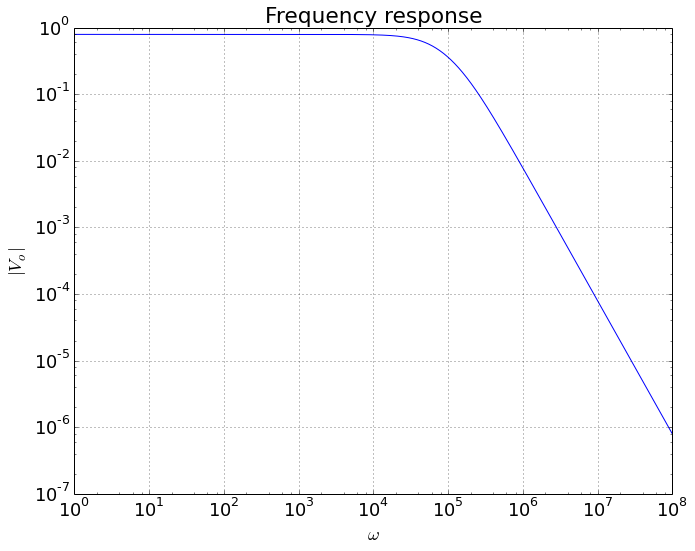

0.0001586/(2.0e-14*s**2 + 4.414e-9*s + 0.0002)


In [11]:
s= symbols("s")
A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1)
#print "G=1000"
ir=V[3]
print ir
w=np.logspace(0,8,801)
ss=1j*w
hf=lambdify(s,ir,"numpy")
v=hf(ss)
plotfigure(size,"$\omega$","$|V_o|$" ,
           "Frequency response", w,abs(v),"b-","loglog")
print simplify(ir)


The above code is used again to obtain the step response of the circuit. For this, the input $V_i$ is passed in as $\frac{1}{s}$- the laplace transform of the unit step function.

G=1000
-0.0001586/(s*(1.0e-5*s + 1)*(-2.0e-9*s + 1.586e-9*s/(1.0e-5*s + 1) - 0.0004 + 0.0002/(1.0e-5*s + 1)))


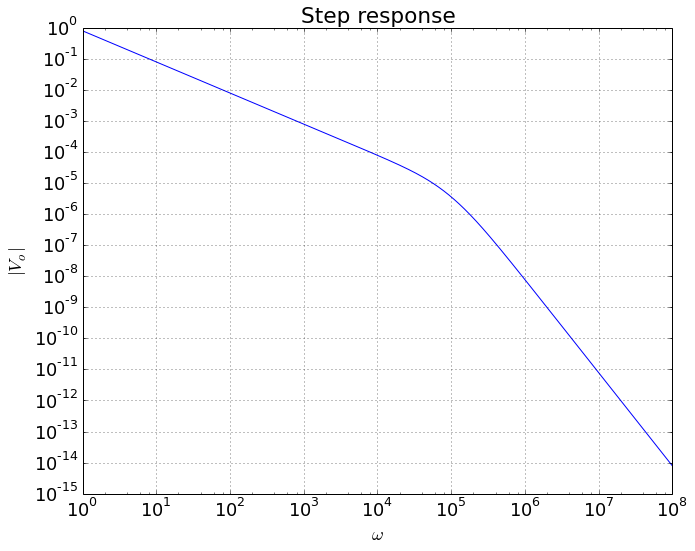

In [12]:
s= symbols("s")
A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1/s)
print "G=1000"
step=V[3]
print step
w=np.logspace(0,8,801)
ss=1j*w
hf=lambdify(s,step,"numpy")
v=hf(ss)
plotfigure(size,"$\omega$","$|V_o|$" ,
           "Step response", w,abs(v),"b-","loglog")


The numerator and denominator of the transfer function are separated and the coefficients obtained to make an LTI instance. 

Vo after a long time = 0.793


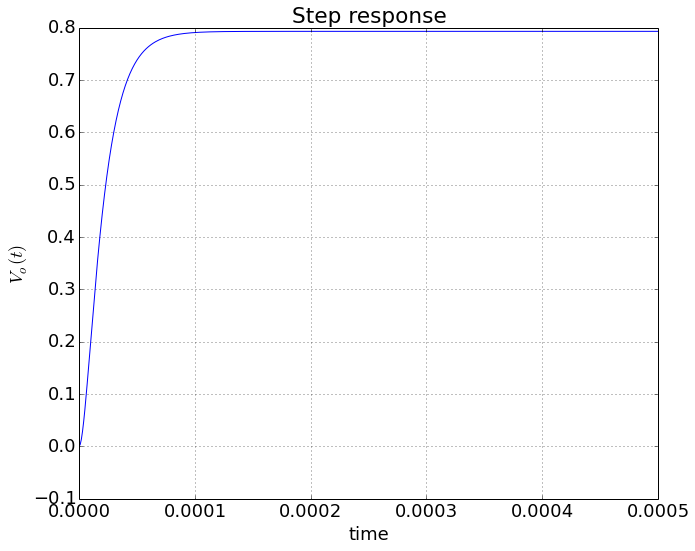

In [13]:
# splitting numerator and denominator
num,den= step.as_numer_denom()
num = map(np.double,list(Poly(num, s).all_coeffs()))
den = map(np.double,list(Poly(den, s).all_coeffs()))
# time domain response
V=sp.lti( num,den)
t= np.arange(0,5e-4,1e-6)
t,x= sp.impulse(V,None,t)
print "Vo after a long time = "+ str(x[-1])
plotfigure(size,"time","$V_o(t)$" , 
           "Step response", t,x,"b-")



The $lsim$ function from SciPy is used ot simulate the output for the following input
\begin{equation}
v_i(t) = (sin(2000 \pi t) + cos(2 \times 10^6 \pi t)) u(t) 
\end{equation} and the output is plotted.

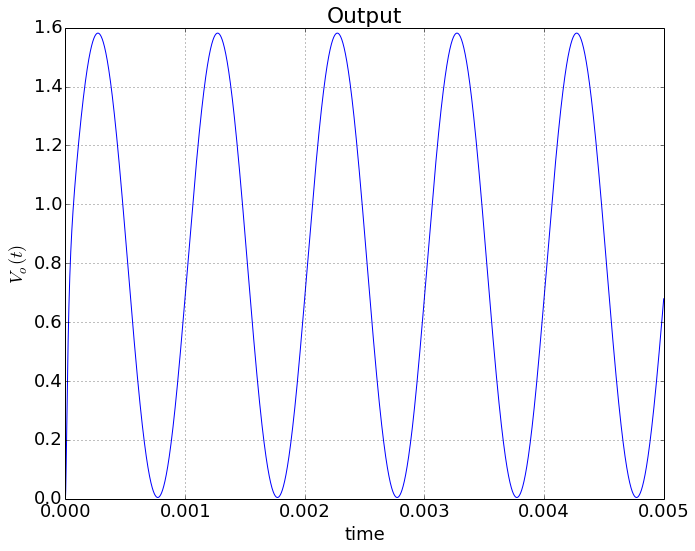

In [14]:
num,den= ir.as_numer_denom()
num = map(np.double,list(Poly(num, s).all_coeffs()))
den = map(np.double,list(Poly(den, s).all_coeffs()))
H = sp.lti(num,den)
t= np.arange(0,5e-3,1e-6)
ip= (np.sin(2000*(np.pi)*t)+np.cos((2e6)*(np.pi)*t))*u(t)
T,op,svec= sp.lsim(H,ip,t)
plotfigure(size,"time","$V_o(t)$" , 
           "Output", T,op,"b-")


The following code repeats the above for the high pass filter. This time around the equations turn out to be

\begin{equation}
A\cdot c = b
\end{equation}
with 
A= $\left(
\begin{matrix}
1 & -\frac{1}{G} & 0 & 0 \\
-G & -1 & G & 0 \\
 0 & 0 & 1 & -\frac{sC_2R_3}{1+sR_3C_2}  \\
0 & 0 & 0 & -sC_1 - \frac{1}{R_1} - sC_2
\end{matrix}
\right)$
, c= $\left(
\begin{matrix}
V_m  \\
V_0  \\
V_p  \\
V_i 
\end{matrix}
\right)$ 
, b= $\left(
\begin{matrix}
0  \\
0  \\
0  \\
-sC_1V_i 
\end{matrix}
\right)$. 

To study the high pass action of the filter, a decaying sinusoid $10^6e^{-t}sin(200 \pi t) u(t)$ is fed to the filter and its output observed.


G=1000
-3.172e-14*s**2/((1.0e-5*s + 1)*(2.0e-5*s*(2.0e-9*s + 0.0001586)/(1.0e-5*s + 1) - 8.0e-9*s - 0.0004))
3.17200000000003e-14*s**2/(4.0e-14*s**2 + 8.828e-9*s + 0.0004)


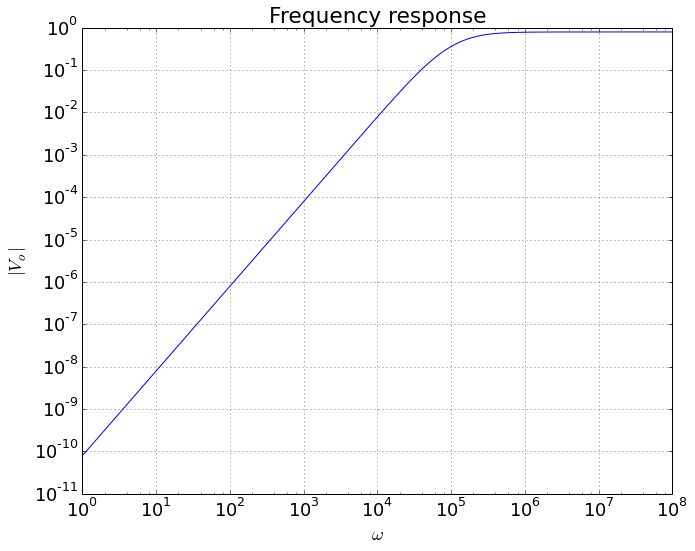

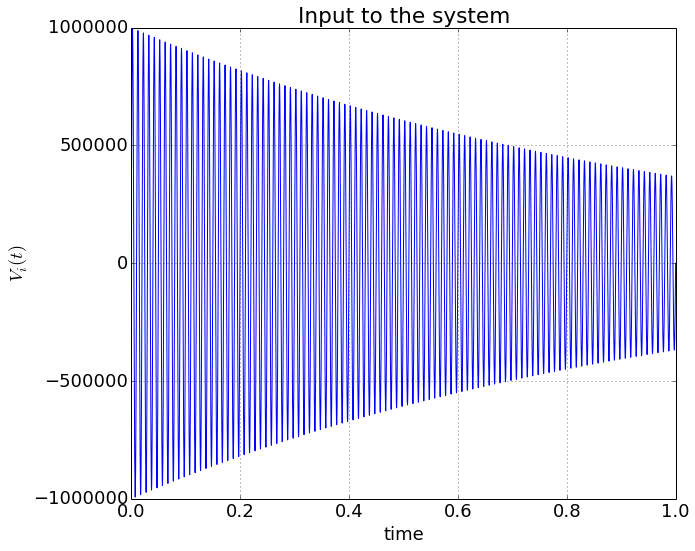

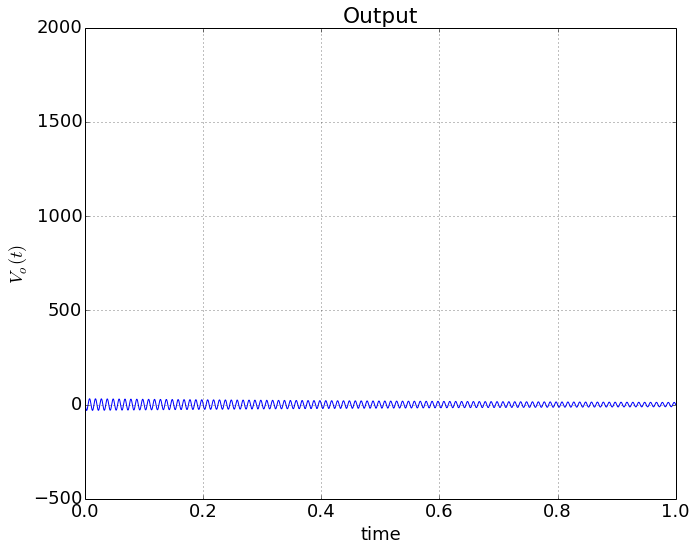

G=1000
-3.172e-14*s/((1.0e-5*s + 1)*(2.0e-5*s*(2.0e-9*s + 0.0001586)/(1.0e-5*s + 1) - 8.0e-9*s - 0.0004))


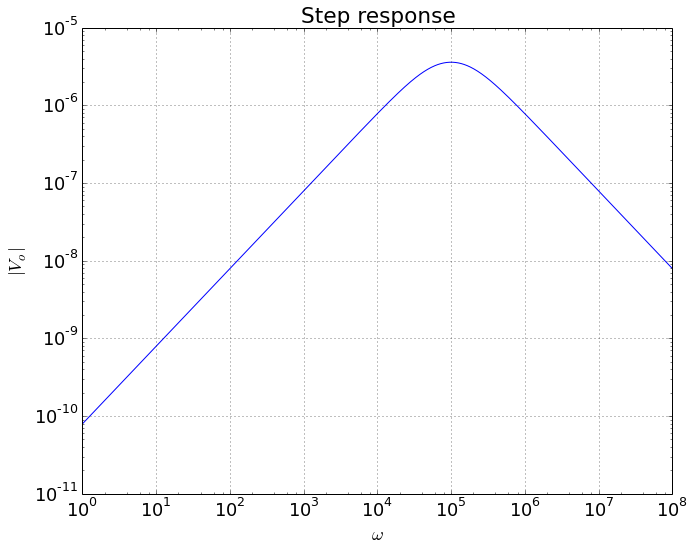

Vo after a long time = -8.00185410652e-15


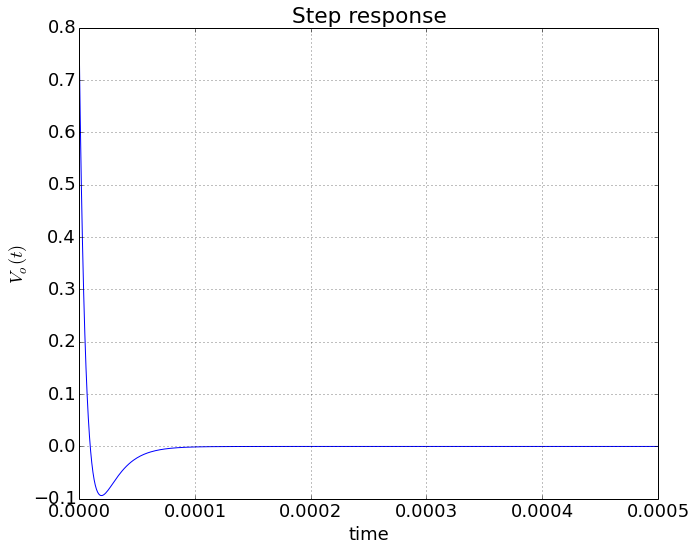

0.793


In [25]:
s= symbols("s")
A,b,V=highpass(10000,10000,1e-9,1e-9,1.586,1)
print "G=1000"
ir=V[1]
print ir
print simplify(ir)
w=np.logspace(0,8,801)
ss=1j*w
hf=lambdify(s,ir,"numpy")
v=hf(ss)
plotfigure(size,"$\omega$","$|V_o|$" ,
           "Frequency response", w,abs(v),"b-","loglog")

num,den= ir.as_numer_denom()
num = map(np.double,list(Poly(num, s).all_coeffs()))
den = map(np.double,list(Poly(den, s).all_coeffs()))
H = sp.lti(num,den)
t= np.arange(0,1,1e-6)
ip= 1e6*(np.exp(-1*t))*(np.sin(200*(np.pi)*t))*u(t)
T,op,svec= sp.lsim(H,ip,t)
plotfigure(size,"time","$V_i(t)$" , 
           "Input to the system", t,ip,"b-")
plotfigure(size,"time","$V_o(t)$" , 
           "Output", T,op,"b-")


s= symbols("s")
A,b,V=highpass(10000,10000,1e-9,1e-9,1.586,1/s)
print "G=1000"
step=V[1]
print step
w=np.logspace(0,8,801)
ss=1j*w
hf=lambdify(s,step,"numpy")
v=hf(ss)
plotfigure(size,"$\omega$","$|V_o|$" ,
           "Step response", w,abs(v),"b-","loglog")
# splitting numerator and denominator
num,den= step.as_numer_denom()
num = map(np.double,list(Poly(num, s).all_coeffs()))
den = map(np.double,list(Poly(den, s).all_coeffs()))
# time domain response
V=sp.lti( num,den)
t= np.arange(0,5e-4,1e-6)
t,x= sp.impulse(V,None,t)
print "Vo after a long time = "+ str(x[-1])
plotfigure(size,"time","$V_o(t)$" , 
           "Step response", t,x,"b-")
print x[0]

# Discussion and Conclusion

## insert image here
The general second order low pass filter with an ideal op amp has the following cut off frequency- $\frac{1}{2 \pi \sqrt{R_1R_2C_1C_2}}$. With the current values of the components, it turns out to be $10^5 rads^{-1}$. This is obvious from the graph. Further for an ideal Sallen Key filter, with the givnen values, the quality factor turns out to be $\frac{\sqrt{R_1R_2C_1C_2}}{C_2(R_1 + R_2)}$ which turns out to be \frac{1}{2} in this case. This would imply a critically damped response. The time domain response would simply rise upto the stable value very quickly. The s-domain response is not maximally flat as $\frac{1}{2} = 0.5 < \frac{1}{\sqrt{2}} \approx 0.707$. However, the quality factor obtained from the simplified function for the transfer function, for a finite G is $\frac{1}{2.207}$ which is slightly overdamped. 

From the above discussion, it is evident that the step resonse of the system in the time domein will not overshoot the final forced response of the system. From the DC analysis of the system (treateing the capacitors as open after a long period of time) the output turns out to be $\frac{G}{2} V_i$ which is 0.793 which matches with the obtained output.

When the forced input is sinusoideal, only the low frequency component of frequency $10^3 rads^{-1}$ survives and the other is completely attenuated. This is obvious from the output plotted.

For the high pass filter the analysis remains much the same- the cutoff remains the same at $10^5 rads^{-1}$ and the quality factor remains the same at  $\frac{1}{2.207}$ which is arises from the fact that the characteristic function remains the same irrespective of the filtering action. A suitably high amplitude sinusoid with input frequency below cutoff is fed to the filter. The output, unsurprisingly is highly attenuated and decays exponentially.

In the s-domain, the step response of the system is that of a bandpass filter. One of the zeros at zero of the high pass filter is cancelled by the pole of the input. At low frequencies, the gain goes up at 20 dB/dec and at high frequency the gain goes down as 20 dB/dec. The time domain response poses a greater challenge and only a hand waving argument is pursued here. Initially, the system encouters a jump, which translates to all frequencies being available in the circuit and consequently the capacitors being short. Here the system is only a noninverting opamp and the output is $\frac{G}{2}V_i$ for the non ideal opamp which is $0.793 V$ which is printed out. Then as the voltage drop across the capacitors increases (they encouter more and more of DC) the voltage drop at the positive terminal decreases and thus $V_p$ decreases beneath $\frac{V_o}{G}$ which leads to negative output. Eventually, the capacitors are open and the output is simply zero.

Thus scientific python can be used to analyse second order active filters very effectively and make a careful study of their responses to various systems.